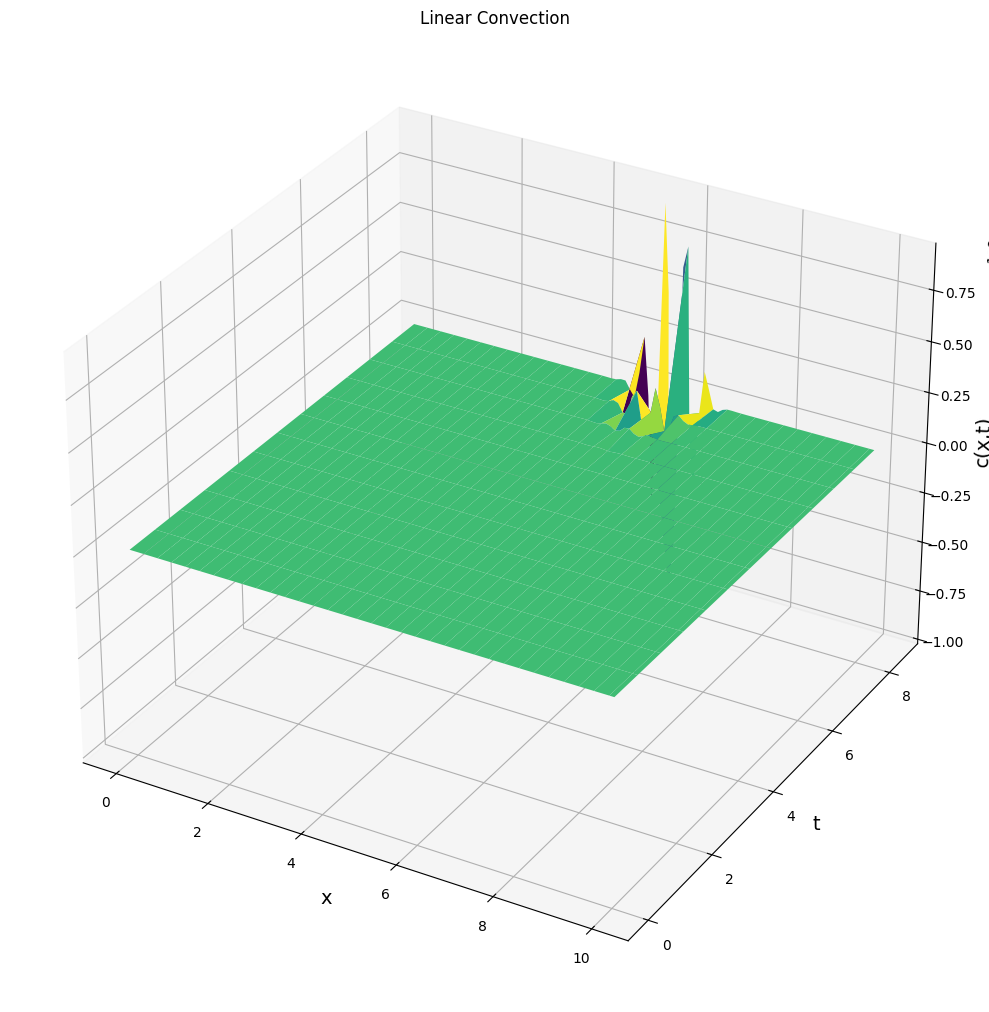

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Setup
L = 10
t_final = 8
u = 1
dx = 0.1
dt = 0.7
time = np.arange(0, t_final + dt, dt)
X = np.arange(0, L + dx, dx)
N = len(X)

# Initial profile (Gaussian pulse centered at x=5)
c = 1 * np.exp(-10 * (5 - X)**2)

# Explicit Euler method
V = np.zeros((len(time), len(X)))
for tc, t in enumerate(time):
    V[tc, :] = c
    if tc < len(time) - 1:  # Don't update after last time step
        c[1:N-1] = c[1:N-1] - u * dt * (c[1:N-1] - c[0:N-2]) / dx  # backward difference

# Plotting the result
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')
X_grid, T_grid = np.meshgrid(X, time)
ax.plot_surface(X_grid, T_grid, V, cmap='viridis')
ax.set_title('Linear Convection')
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('t', fontsize=14)
ax.set_zlabel('c(x,t)', fontsize=14)
plt.tight_layout()
plt.show()

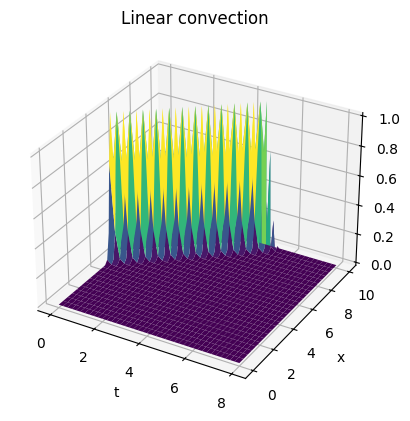

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Setup
L = 10
t_final = 8
u = 1
dx = 0.2
dt = 0.2
time = np.arange(0, t_final + dt, dt)
X = np.arange(0, L + dx, dx)
N = len(X)

# Initial profile
c = np.exp(-10 * (5 - X)**2)

# Explicit Euler
V = np.zeros((len(time), N))
for tc, t in enumerate(time):
    V[tc, :] = c
    c[1:N-1] = c[1:N-1] - u * dt * (c[1:N-1] - c[0:N-2]) / dx  # backward difference

# Plotting the result (swap x and t)
T, X = np.meshgrid(time, X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T, X, V.T, cmap='viridis')  # transpose V to match new axes
ax.set_title('Linear convection')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('c')
plt.show()


Courant number: 1.00


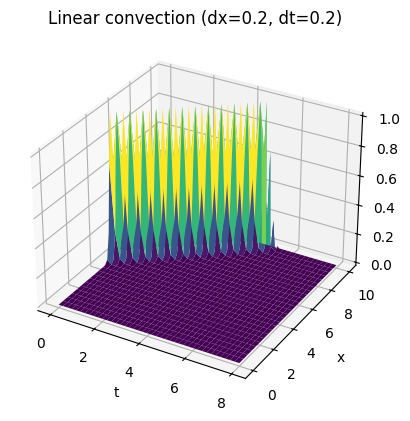

Courant number: 2.00


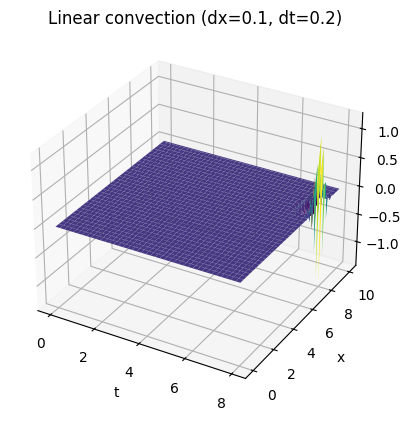

Courant number: 2.00


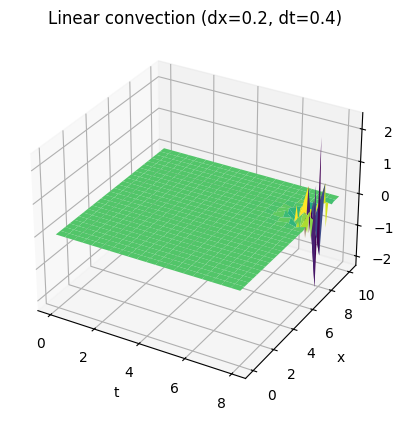

Courant number: 0.50


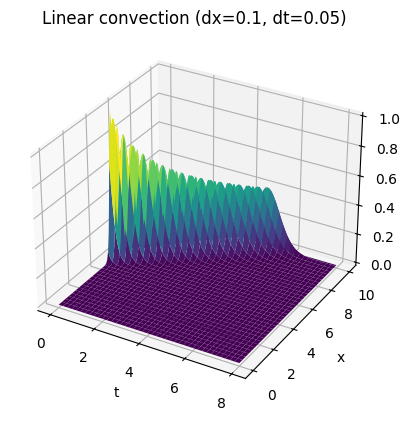

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_convection(dx, dt, L=10, t_final=8, u=1):
    time = np.arange(0, t_final + dt, dt)
    X = np.arange(0, L + dx, dx)
    N = len(X)

    c = np.exp(-10 * (5 - X)**2)
    V = np.zeros((len(time), N))

    for tc, t in enumerate(time):
        V[tc, :] = c
        c[1:N-1] = c[1:N-1] - u * dt * (c[1:N-1] - c[0:N-2]) / dx

    return time, X, V

def plot_result(time, X, V, dx, dt):
    T, X = np.meshgrid(time, X)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(T, X, V.T, cmap='viridis')
    ax.set_title(f'Linear convection (dx={dx}, dt={dt})')
    ax.set_xlabel('t')
    ax.set_ylabel('x')
    ax.set_zlabel('c')
    plt.show()

# Example: Vary dx and dt
for dx, dt in [(0.2, 0.2), (0.1, 0.2), (0.2, 0.4), (0.1, 0.05)]:
    time, X, V = simulate_convection(dx, dt)
    print(f"Courant number: {1 * dt / dx:.2f}")
    plot_result(time, X, V, dx, dt)


**What does changing the value of the linear velocity u do? Also check for negative velocity**

Running simulation with u = 1.0


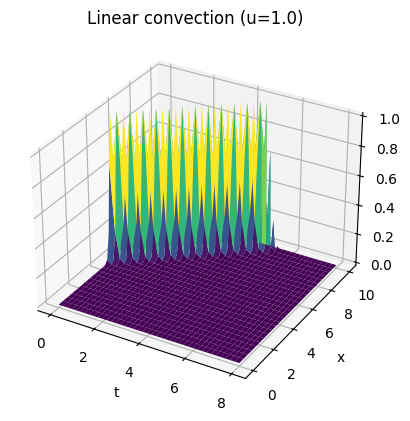

Running simulation with u = 0.5


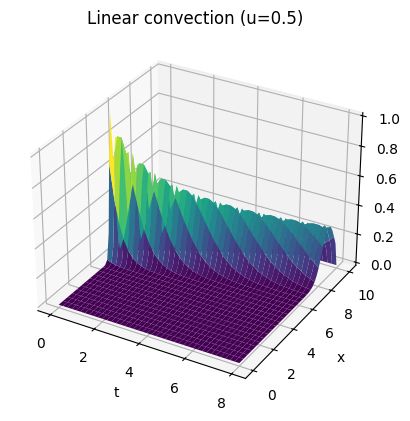

Running simulation with u = 0.0


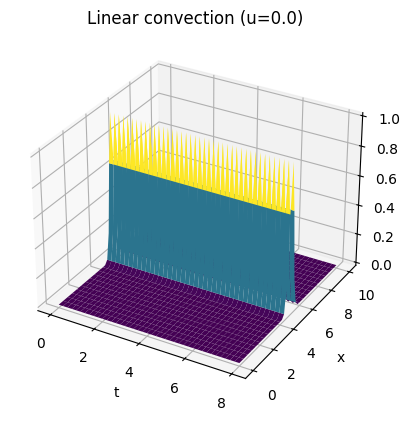

Running simulation with u = -0.5


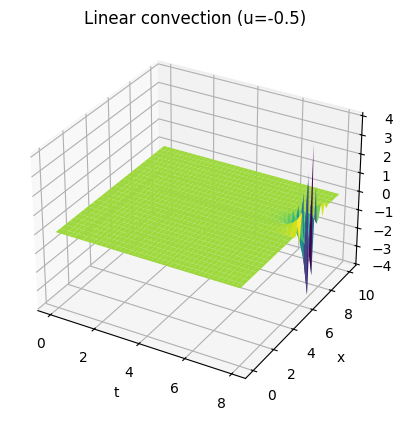

Running simulation with u = -1.0


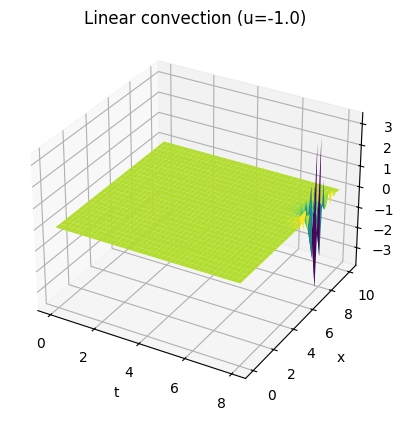

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_convection(u, dx=0.2, dt=0.2, L=10, t_final=8):
    time = np.arange(0, t_final + dt, dt)
    X = np.arange(0, L + dx, dx)
    N = len(X)

    c = np.exp(-10 * (5 - X)**2)
    V = np.zeros((len(time), N))

    for tc, t in enumerate(time):
        V[tc, :] = c
        # Backward difference (only stable if u >= 0)
        c[1:N-1] = c[1:N-1] - u * dt * (c[1:N-1] - c[0:N-2]) / dx

    return time, X, V

def plot_result(time, X, V, u):
    T, X = np.meshgrid(time, X)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(T, X, V.T, cmap='viridis')
    ax.set_title(f'Linear convection (u={u})')
    ax.set_xlabel('t')
    ax.set_ylabel('x')
    ax.set_zlabel('c')
    plt.show()

# Test different velocities
for u in [1.0, 0.5, 0.0, -0.5, -1.0]:
    print(f"Running simulation with u = {u}")
    time, X, V = simulate_convection(u)
    plot_result(time, X, V, u)


**Compare Backward and Forward Difference Schemes**


Simulating with velocity u = 1.0


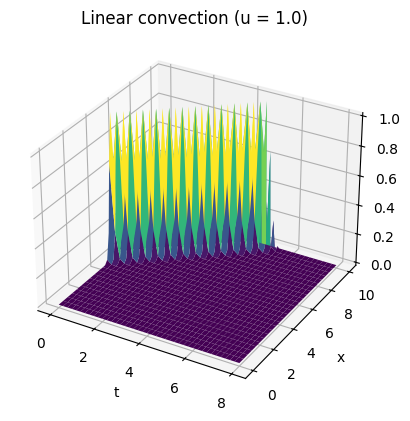


Simulating with velocity u = 0.5


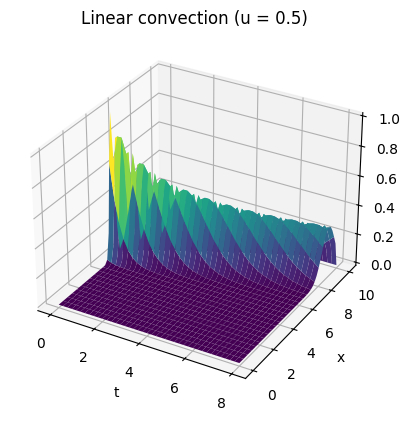


Simulating with velocity u = 0.0


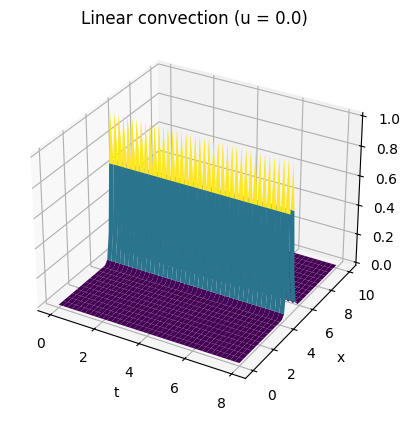


Simulating with velocity u = -0.5


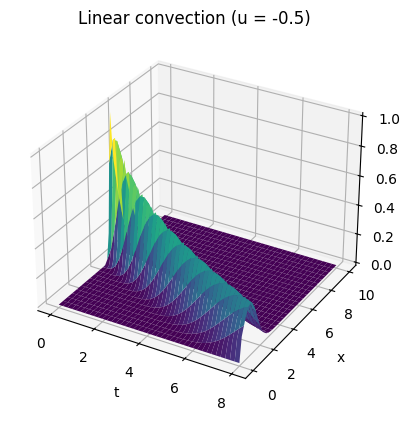


Simulating with velocity u = -1.0


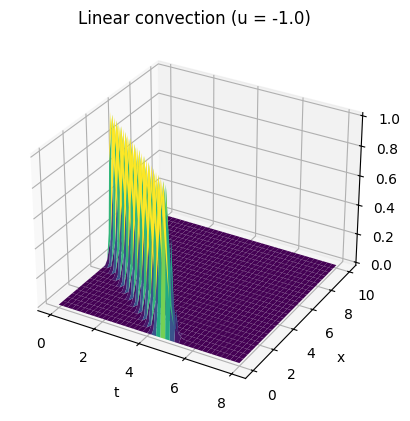

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_convection(u, dx=0.2, dt=0.2, L=10, t_final=8):
    time = np.arange(0, t_final + dt, dt)
    X = np.arange(0, L + dx, dx)
    N = len(X)

    c = np.exp(-10 * (5 - X)**2)
    V = np.zeros((len(time), N))

    for tc, t in enumerate(time):
        V[tc, :] = c
        if u > 0:
            # Backward difference
            c[1:N-1] = c[1:N-1] - u * dt * (c[1:N-1] - c[0:N-2]) / dx
        elif u < 0:
            # Forward difference
            c[1:N-1] = c[1:N-1] - u * dt * (c[2:N] - c[1:N-1]) / dx
        # If u == 0, c remains unchanged
    return time, X, V

def plot_result(time, X, V, u):
    T, X = np.meshgrid(time, X)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(T, X, V.T, cmap='viridis')
    ax.set_title(f'Linear convection (u = {u})')
    ax.set_xlabel('t')
    ax.set_ylabel('x')
    ax.set_zlabel('c')
    plt.show()

# Test and compare multiple velocities
for u in [1.0, 0.5, 0.0, -0.5, -1.0]:
    print(f"\nSimulating with velocity u = {u}")
    time, X, V = simulate_convection(u)
    plot_result(time, X, V, u)


 **Discretize according to a central difference (CD) for x and adjust the code. Is the
numerical solution stable?**


Central Difference Simulation for u = 1.0


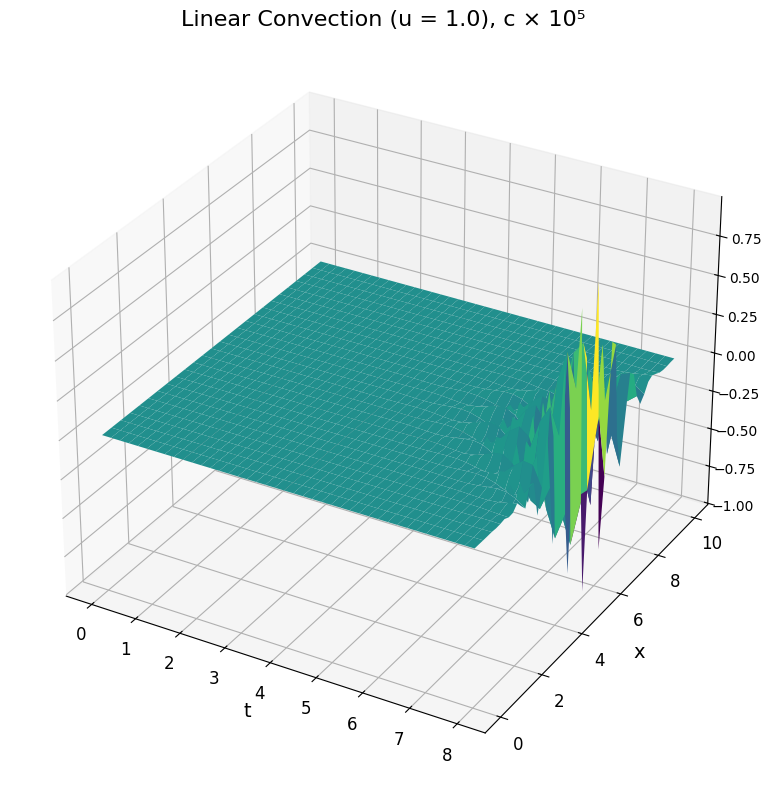


Central Difference Simulation for u = -1.0


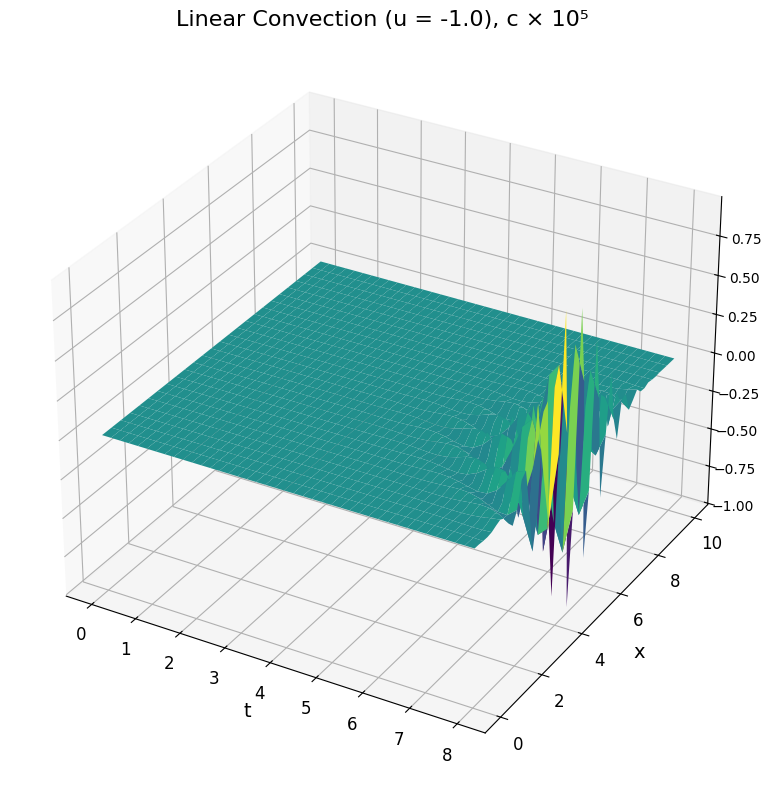

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_convection_central(u, dx=0.2, dt=0.2, L=10, t_final=8):
    time = np.arange(0, t_final + dt, dt)
    X = np.arange(0, L + dx, dx)
    N = len(X)

    c = np.exp(-10 * (5 - X)**2)
    V = np.zeros((len(time), N))

    for tc, t in enumerate(time):
        V[tc, :] = c
        # Central difference scheme
        c[1:N-1] = c[1:N-1] - u * dt * (c[2:N] - c[0:N-2]) / (2 * dx)

    return time, X, V

def plot_result(time, X, V, u):
    T, X = np.meshgrid(time, X)
    fig = plt.figure(figsize=(12, 8))  # Increased figure size
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(T, X, V.T * 1e5, cmap='viridis')
    
    ax.set_title(f'Linear Convection (u = {u}), c × 10⁵', fontsize=16)
    ax.set_xlabel('t', fontsize=14)
    ax.set_ylabel('x', fontsize=14)
    #ax.set_zlabel('c × 10⁵', fontsize=10)

    ax.tick_params(axis='both', labelsize=12)
    ax.tick_params(axis='z', labelsize=10)

    fig.tight_layout()  # Prevent label cutoffs
    plt.show()



# Example test case
for u in [1.0, -1.0]:
    print(f"\nCentral Difference Simulation for u = {u}")
    time, X, V = simulate_convection_central(u)
    plot_result(time, X, V, u)


***1D Linear Convection and Diffusion***

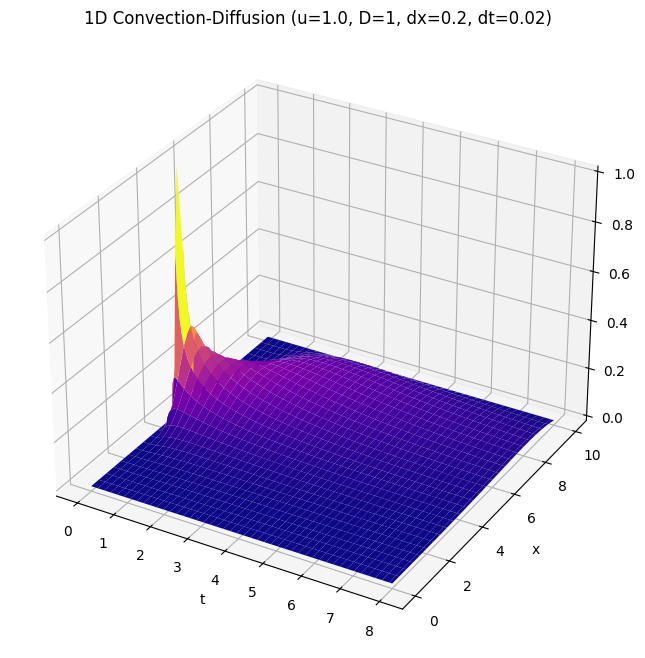

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_convection_diffusion(u=1.0, D=1, dx=0.2, dt=0.02, L=10, t_final=8):
    # Spatial and time grids
    x = np.arange(0, L + dx, dx)
    time = np.arange(0, t_final + dt, dt)
    N = len(x)

    # Initial condition: Gaussian centered at 5
    c = np.exp(-10 * (x - 5)**2)
    V = np.zeros((len(time), N))

    for tc, t in enumerate(time):
        V[tc, :] = c
        c_new = c.copy()
        for i in range(1, N-1):
            convection = -u * (c[i+1] - c[i-1]) / (2 * dx)
            diffusion = D * (c[i+1] - 2*c[i] + c[i-1]) / dx**2
            c_new[i] = c[i] + dt * (convection + diffusion)
        c = c_new

    return time, x, V

def plot_surface(time, x, V):
    T, X = np.meshgrid(time, x)
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(T, X, V.T, cmap='plasma')
    ax.set_title('1D Convection-Diffusion (u=1.0, D=1, dx=0.2, dt=0.02)')
    ax.set_xlabel('t')
    ax.set_ylabel('x')
    #ax.set_zlabel('c(x, t)')
    plt.show()

# Run the simulation
time, x, V = simulate_convection_diffusion(u=1.0, D=1, dx=0.2, dt=0.02)
plot_surface(time, x, V)


**Investigate the stability by changing the time and spatial parameters, as well as the linear velocity and diffusion coefficient.**


u = 1, D = 0.1, dx = 0.1, dt = 0.01, Courant (C) = 0.10, Diffusion (α) = 0.10


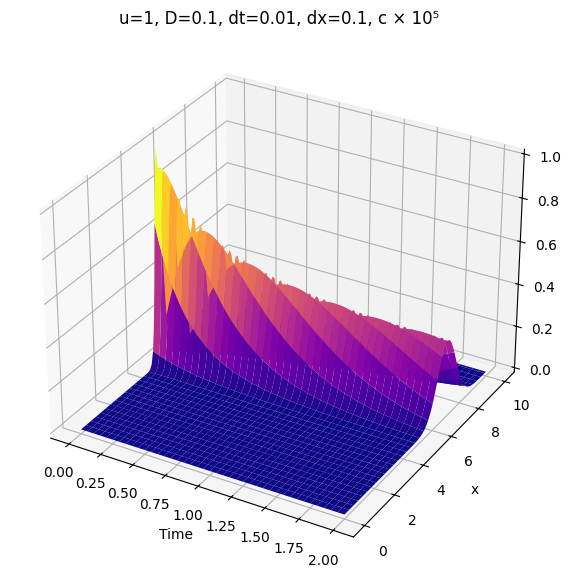

u = 1.0, D = 0.1, dx = 0.1, dt = 0.1, Courant (C) = 1.00, Diffusion (α) = 1.00


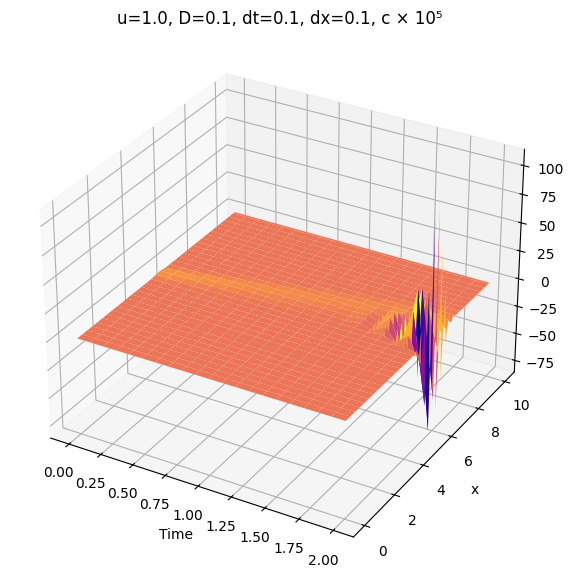

u = 2.0, D = 0.1, dx = 0.1, dt = 0.05, Courant (C) = 1.00, Diffusion (α) = 0.50


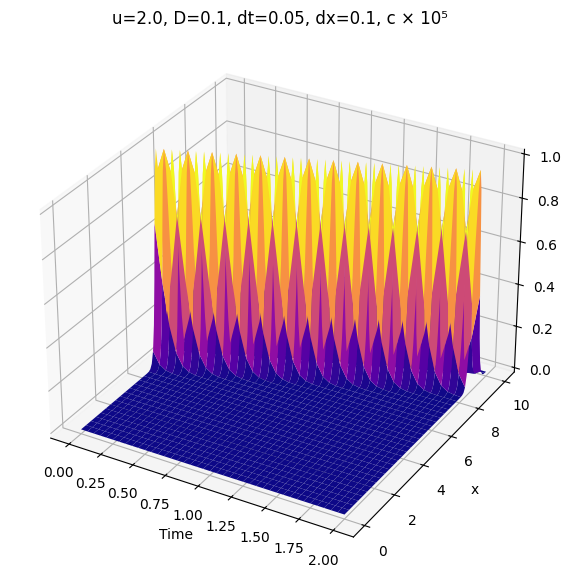

u = 1.0, D = 0.5, dx = 0.05, dt = 0.005, Courant (C) = 0.10, Diffusion (α) = 1.00


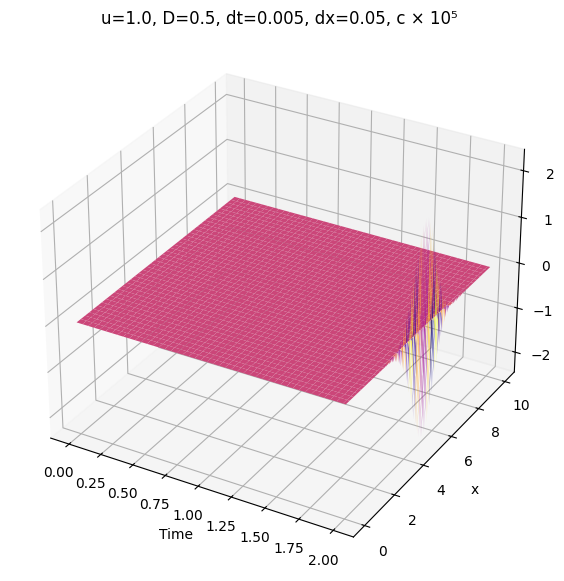

u = 1.0, D = 0.01, dx = 0.1, dt = 0.05, Courant (C) = 0.50, Diffusion (α) = 0.05


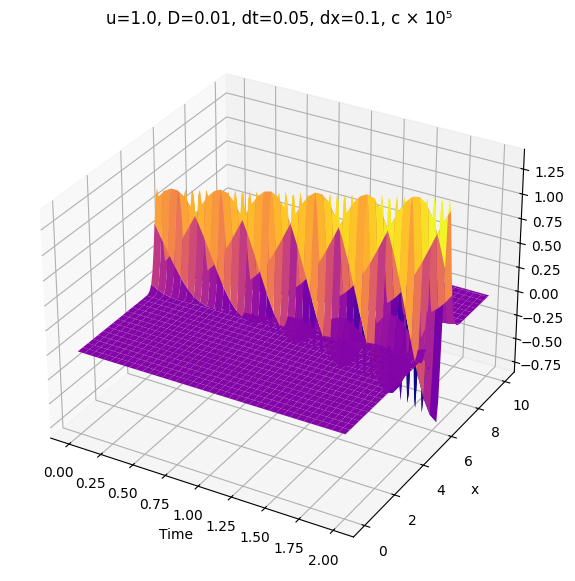

In [59]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_convection_diffusion(u, D, dx, dt, L=10, t_final=2, plot=True):
    # Compute stability metrics
    C = u * dt / dx
    alpha = D * dt / dx**2
    print(f"u = {u}, D = {D}, dx = {dx}, dt = {dt}, Courant (C) = {C:.2f}, Diffusion (α) = {alpha:.2f}")

    x = np.arange(0, L + dx, dx)
    time = np.arange(0, t_final + dt, dt)
    N = len(x)

    c = np.exp(-10 * (x - 5)**2)
    V = np.zeros((len(time), N))

    for tc, t in enumerate(time):
        V[tc, :] = c
        c_new = c.copy()
        for i in range(1, N-1):
            convection = -u * (c[i+1] - c[i-1]) / (2 * dx)
            diffusion = D * (c[i+1] - 2*c[i] + c[i-1]) / dx**2
            c_new[i] = c[i] + dt * (convection + diffusion)
        c = c_new

    if plot:
        T, X = np.meshgrid(time, x)
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(T, X, V.T, cmap='plasma')
        ax.set_title(f'u={u}, D={D}, dt={dt}, dx={dx}, c × 10⁵')
        ax.set_xlabel('Time')
        ax.set_ylabel('x')
        #ax.set_zlabel('c × 10⁵')
        plt.show()
    return C, alpha

# Parameter sets to test
tests = [
    (1, 0.1, 0.1, 0.01),  # Stable
    (1.0, 0.1, 0.1, 0.1),   # CFL = 1, Diffusion = 1 → unstable
    (2.0, 0.1, 0.1, 0.05),  # CFL = 1 → borderline
    (1.0, 0.5, 0.05, 0.005),# Fine grid, strong diffusion
    (1.0, 0.01, 0.1, 0.05), # Weak diffusion, CFL > 1 → unstable
]

# Run all tests
for u, D, dx, dt in tests:
    simulate_convection_diffusion(u, D, dx, dt)


***2D Convection and Diffusion***

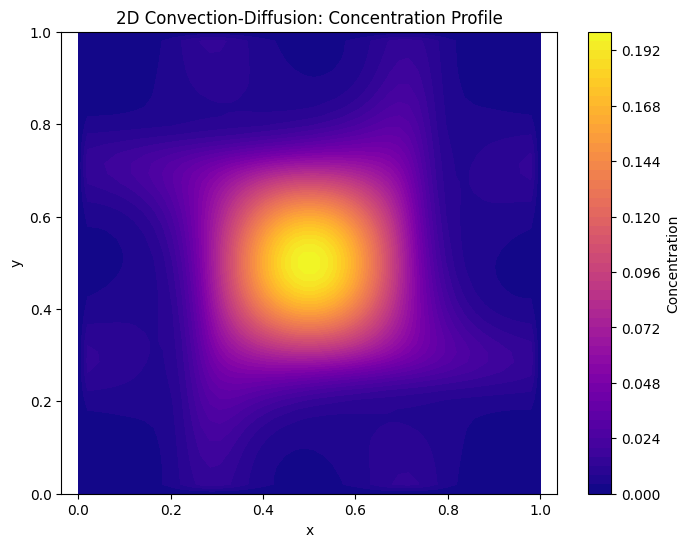

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def convection_diffusion_2d(Nx=50, Ny=50, L=1.0, D=0.01, dt=0.001, t_final=1.0):
    dx = dy = L / (Nx - 1)
    x = np.linspace(0, L, Nx)
    y = np.linspace(0, L, Ny)
    X, Y = np.meshgrid(x, y, indexing='ij')

    # Velocity field (periodic vortex)
    u = np.cos(2 * np.pi * X) * np.sin(2 * np.pi * Y)
    v = -np.sin(2 * np.pi * X) * np.cos(2 * np.pi * Y)

    # Initial condition: Gaussian blob in center
    c = np.exp(-100 * ((X - 0.5)**2 + (Y - 0.5)**2))
    c_new = np.zeros_like(c)

    Nt = int(t_final / dt)
    for _ in range(Nt):
        # Apply periodic boundary conditions
        c[0, :] = c[-2, :]
        c[-1, :] = c[1, :]
        c[:, 0] = c[:, -2]
        c[:, -1] = c[:, 1]

        for i in range(1, Nx - 1):
            for j in range(1, Ny - 1):
                dcdx = (c[i+1, j] - c[i-1, j]) / (2 * dx)
                dcdy = (c[i, j+1] - c[i, j-1]) / (2 * dy)
                d2cdx2 = (c[i+1, j] - 2 * c[i, j] + c[i-1, j]) / dx**2
                d2cdy2 = (c[i, j+1] - 2 * c[i, j] + c[i, j-1]) / dy**2

                c_new[i, j] = c[i, j] - dt * (u[i, j] * dcdx + v[i, j] * dcdy) + dt * D * (d2cdx2 + d2cdy2)

        c[:, :] = c_new

    return X, Y, c

# Run and plot
X, Y, c_final = convection_diffusion_2d()

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, c_final, levels=50, cmap='plasma')
plt.colorbar(label='Concentration')
plt.title('2D Convection-Diffusion: Concentration Profile')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()
